Suppose X is the data have n samples with p-dimensional, X is n*p, d is a dimension to reduction.
* pca = PCA(d)
>d is the dimension to reduction.
* pca.train(X)
>return n*d data
* pca.plot(plt, X)
>only play on 
>>1. d = 2
>>2. p = 2 and d = 1

In [7]:
#python program
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import matplotlib as mpl 
import matplotlib
from mpl_toolkits.mplot3d import Axes3D 

In [16]:
class PCA:
  def __init__(self, d = 2):
    self.d = d

  def train(self, X):
    n, p = X.shape
    print('Data shape(size, dimensional):', X.shape)
    mu = np.matrix([t / n for t in [sum(row) for row in X.T]])   
    Z = X - np.ones((n, 1)).dot(mu) #E[Z]=0
    S = Z.T.dot(Z) # p*p
    evalue, evec = np.linalg.eigh(S)
    #order big->small
    evalue_index = np.argsort(evalue)[::-1]
    evec = np.array(evec); evec = [evec[:, i] for i in evalue_index] # sort eigenvecor
    U = np.matrix([evec[i] for i in range(self.d)]) # the first d eigenvectors
    self.B = np.array(Z.dot(U.T)) #投影點座標(係數)
    self.D = np.array(np.ones((n, 1)).dot(mu) + self.B.dot(U)) #投影點在原維度座標
 
  def plot(self, plt, X):
    n, p = X.shape
    if(p == 2 and self.d == 1):
      plt.plot(X[:, 0], X[:, 1], 'r.')  #plot origin points
      plt.plot(self.D[:, 0], self.D[:, 1]) #plot pca line
      plt.plot(self.D[:, 0], self.D[:, 1], 'g*') #plot pca line
      # draw the vertical line from original data to pca line
      a0 = (self.D[:, 1][2] - self.D[:, 1][1])/(self.D[:, 0][2] - self.D[:, 0][1])
      b0 = self.D[:, 1][0] - a0 * self.D[:, 0][0]
      a = -1 / a0
      for i in range(n):
        b = X[:, 1][i] - a * X[:, 0][i]
        x = np.array([X[:, 0][i], self.D[:, 0][i]])
        y = a * x + b
        plt.plot(x, y, 'k--') 
    if(self.d == 2):
      plt.plot(self.B[:, 0], self.B[:, 1], '.') #投影點在2-dim上座標

### Example1 - 2-dimensional data to 1 line

Data shape(size, dimensional): (10, 2)


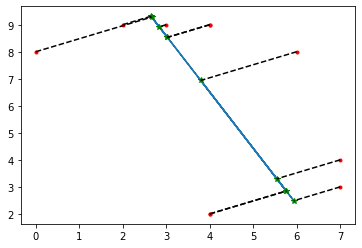

In [17]:
X = np.random.rand(10, 2) * 10
X = np.floor(X)
# PCA implement reduction to 1-dim
pca = PCA(1)
pca.train(X)
pca.plot(plt, X)

### Example2 - swiss roll

In [18]:
# 生成 X
n=1000
x = np.array(range(n))
t = 3 * math.pi * x / n
a = [r * math.cos(r) for r in t];
b = [5 * random.random() for i in range(n)];
c = [r * math.sin(r) for r in t];
X = np.matrix([a, b, c])
rand_axis = [1, 1, 1]; radian = 60
M = linalg.expm(np.cross(np.eye(3), rand_axis / linalg.norm(rand_axis) * radian))
X = np.array(M.dot(X) + 10 * np.random.rand(3, 1).dot(np.ones((1, n)))).T

Data shape(size, dimensional): (1000, 3)


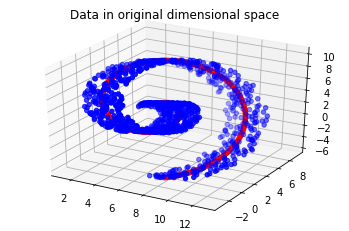

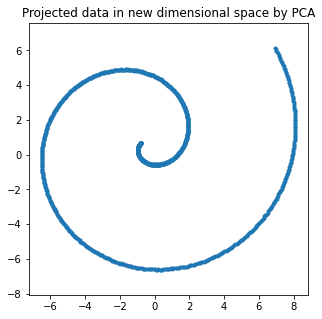

In [19]:
# PCA implement reduction to 2-dim
pca = PCA(2)
pca.train(X)

# 在三維顯示投影結果
fig1 = plt.figure() #視窗1
fig1.canvas.set_window_title("3-dimension")
ax = plt.subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = 'b') #原資料點
ax.scatter(pca.D[:, 0], pca.D[:, 1], pca.D[:, 2], c = 'r') #投影點在原維度上座標
plt.title('Data in original dimensional space')

# 投影結果
fig2 = plt.figure(figsize=(5, 5)) #視窗2
fig2.canvas.set_window_title("2-dimension")
plt.axis('equal')
pca.plot(plt, X) #投影點在新維度上座標
plt.title('Projected data in new dimensional space by PCA')

plt.show()

### Example3 - Toroidal helix

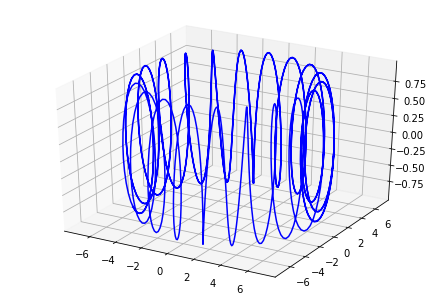

In [20]:
import math
def Helix(R, r, n):
  t = np.linspace(0, 10, 1000)
  x = (R + r * np.cos(n*t))*np.cos(t)
  y = (R + r * np.cos(n*t))*np.sin(t)
  z = r * np.sin(n*t)
  return np.array([x, y, z]).T
helix = Helix(6, 1, 20)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(helix[:, 0], helix[:, 1], helix[:, 2], c = 'b')

Data shape(size, dimensional): (1000, 3)


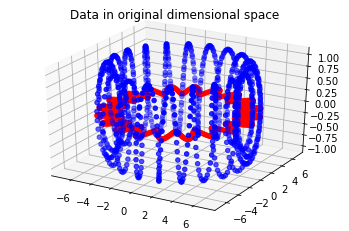

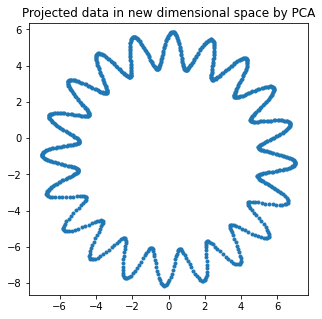

In [23]:
X = helix
# PCA implement reduction to 2-dim
pca = PCA(2)
pca.train(X)

# 在三維顯示投影結果
fig1 = plt.figure() #視窗1
fig1.canvas.set_window_title("3-dimension")
ax = plt.subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = 'b') #原資料點
ax.scatter(pca.D[:, 0], pca.D[:, 1], pca.D[:, 2], c = 'r') #投影點在原維度上座標
plt.title('Data in original dimensional space')

# 投影結果
fig2 = plt.figure(figsize=(5, 5)) #視窗2
fig2.canvas.set_window_title("2-dimension")
plt.axis('equal')
pca.plot(plt, X) #投影點在新維度上座標
plt.title('Projected data in new dimensional space by PCA')

plt.show()